In [1]:
import json
import os

In [2]:
with open('./labels/000002.json') as fr:
    info=json.load(fr)

In [3]:
info

{'bboxes': [{'id': 0,
   'x_min': 0.6479790660225443,
   'y_min': 0.44624,
   'x_max': 0.8014734299516908,
   'y_max': 0.8745066666666667,
   'label': 'Misc'},
  {'id': 1,
   'x_min': 0.5292995169082125,
   'y_min': 0.5070133333333333,
   'x_max': 0.5636634460547505,
   'y_max': 0.5957066666666666,
   'label': 'Car'}],
 'image_width': 1242,
 'image_height': 375,
 'num_box': 2,
 'image_path': '../images/000002.png'}

Pedestrian
883.6799999999998 144.15 53.67000000000019 114.85999999999997


<Figure size 2160x21600 with 0 Axes>

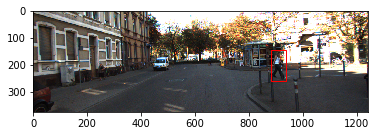

Pedestrian
873.7 152.1 59.74000000000012 103.97000000000001


<Figure size 2160x21600 with 0 Axes>

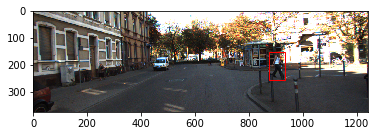

Car
444.29 171.04 60.66000000000001 54.779999999999994


<Figure size 2160x21600 with 0 Axes>

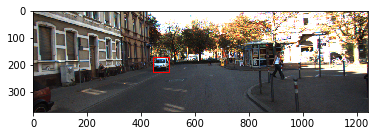

Pedestrian
649.28 168.1 15.329999999999973 38.300000000000004


<Figure size 2160x21600 with 0 Axes>

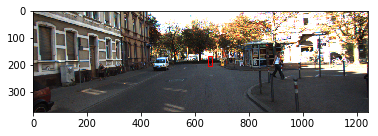

Car
0.0 217.12 85.92000000000002 156.88


<Figure size 2160x21600 with 0 Axes>

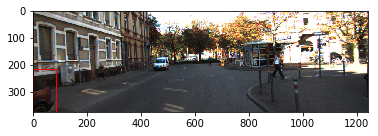

Pedestrian
240.35 190.31 27.67000000000001 71.30000000000001


<Figure size 2160x21600 with 0 Axes>

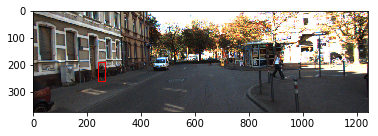

DontCare
0.0 226.05999999999997 88.58000000000001 146.94000000000003


<Figure size 2160x21600 with 0 Axes>

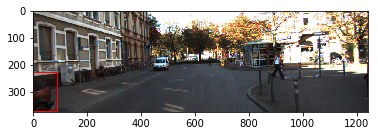

DontCare
567.39 173.95 7.470000000000017 16.65


<Figure size 2160x21600 with 0 Axes>

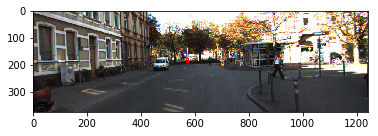

DontCare
727.5800000000002 165.75 9.499999999999904 27.000000000000004


<Figure size 2160x21600 with 0 Axes>

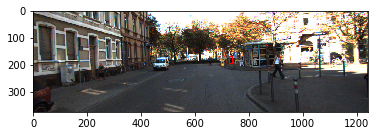

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


im = np.array(Image.open('./images/000011.png'))
with open('./labels/000011.json') as fr:
    info=json.load(fr)
    image_width=info['image_width']
    image_height=info['image_height']
    
    for each_box in info['bboxes']:
        label=each_box['label']
        print(label)
        x1=image_width*(each_box['x_min'])
        y1=image_height*(each_box['y_min'])
        box_width=image_width*(each_box['x_max']-each_box['x_min'])
        box_height=image_height*(each_box['y_max']-each_box['y_min'])
        print(x1,y1,box_width,box_height)

        # Create figure and axes
        fig=plt.figure(figsize=(30,300))
        fig,ax = plt.subplots(1)

        # Display the image
        ax.imshow(im)

        # Create a Rectangle patch
        #第一个元组里面表示左上角的坐标，第三个参数表示框的框，第四个参数表示框的高
        rect = patches.Rectangle((x1,y1),box_width,box_height,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
        plt.show()

#### 切割图像并生成新的json文件

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import matplotlib 
import json
import os
input_width=376
img_name='000010'
save_dir='./test'
image_dir='./images'
labels_dir='./labels'
for each_img in os.listdir('%s'%image_dir):
    img_name=each_img.split('.')[0]
    print(img_name)

000011
000010
000002
000014
000012
000015
000013


In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import matplotlib 
import json

input_width=376
# img_name='000010'
save_dir='./test'
image_dir='./images'
labels_dir='./labels'
for each_img in os.listdir('%s'%image_dir):
    img_name=each_img.split('.')[0]
    print(img_name)
    with open('%s/%s.json'%(labels_dir,img_name)) as fr:
        info=json.load(fr)
        image_width=info['image_width']
        image_height=info['image_height']
        image_path='%s/%s.png'%(image_dir,img_name)
        img=plt.imread(image_path)
        i=0
        x1_list=[]
        for each in info['bboxes']:
            x1=image_width*(each['x_min'])
            x1_list.append(x1)
        x1_max=max(x1_list)
        x1_min=min(x1_list)
#         print(x1_list)
        x1_max_index=x1_list.index(x1_max)
        x1_min_index=x1_list.index(x1_min)
        x1_max_box_width=(info['bboxes'][x1_max_index]['x_max']- info['bboxes'][x1_max_index]['x_min'])*info['image_width']
        diff=x1_max+x1_max_box_width-x1_min
#         print(info['bboxes'][x1_max_index]['x_min']*info['image_width'])


        #我认为卷积神经网络在处理这种比例为2:1的图片的压缩时，还是能表现的较好，若diff<500则将图像生成为(375,376,3)的
        if diff<input_width:
#             print('diff<input_width')
            new_x1=x1_min-(input_width-diff)/2
            new_x2=new_x1+input_width
        elif diff<500:
            #若是input_width<diff<500，则认为卷积神经网络仍然能够处理好这种程度的压缩，所以就按照最小的框的左边到最大框的右边来处理，并分别在最左边和最右边加上100个像素
#             print('diff>500')
            new_x1=x1_min-10
            new_x2=info['bboxes'][x1_max_index]['x_max']+10
        else:
            #这类情况应该很少，遇到了则单独处理
#             print('该图%s.png diff>500'%img_name)
#             print(x1_list)
#             print(sorted(x1_list))
            sorted_list=sorted(x1_list)
            tmp_index_1=0
            tmp_index_2=0
            tmp_index_3=0
            for z in range(len(x1_list)):
                if sorted_list[z]<500:
                    tmp_index_1=z
                elif sorted_list[z]<1000:
                    tmp_index_2=z
                elif sorted_list[z]>1000:
                    tmp_index_3=z
#             print(tmp_index_1,tmp_index_2,tmp_index_3)
            tmp_index_1=x1_list.index(sorted_list[tmp_index_1])
            tmp_index_2=x1_list.index(sorted_list[tmp_index_2])
            tmp_index_3=x1_list.index(sorted_list[tmp_index_3])
#             print(tmp_index_1,tmp_index_2,tmp_index_3)

            #循环三次将大图切割为三个小图
            num_box=info['num_box']
            bbox_1=[]
            #save three picture
            l1_top_box=0
            r1_top_box=int(info['bboxes'][tmp_index_1]['x_max']*image_width)+10
            y1=0
            y2=image_height
            img_1_width=r1_top_box
            cut_image=img[y1:y2,l1_top_box:r1_top_box,:]
            matplotlib.image.imsave('%s/%s_%d.png'%(save_dir,img_name,0),cut_image)

            #the second images

            bbox_2=[]
            #save three picture
            l2_top_box=r1_top_box
            r2_top_box=int(info['bboxes'][tmp_index_2]['x_max']*image_width)+10
            y1=0
            y2=image_height
            img_2_width=r2_top_box-l2_top_box
            cut_image=img[y1:y2,l2_top_box:r2_top_box,:]
            matplotlib.image.imsave('%s/%s_%d.png'%(save_dir,img_name,1),cut_image)

            #the thrid images

            bbox_3=[]
            #save three picture
            l3_top_box=r2_top_box
    #         r3_top_box=int(info['bboxes'][tmp_index_3]['x_max']*image_width)+10
            r3_top_box=image_width
            y1=0
            y2=image_height
            img_3_width=r3_top_box-l3_top_box
            cut_image=img[y1:y2,l3_top_box:r3_top_box,:]
            matplotlib.image.imsave('%s/%s_%d.png'%(save_dir,img_name,2),cut_image)
            json_dict_1={}
            bbox_1=[]
            bbox_2=[]
            bbox_3=[]
            for each_box in info['bboxes']:
                i=0;j=0;z=0
                x1=each_box['x_min']*image_width
                box_width=(each_box['x_max']-each_box['x_min'])*image_width
                if x1<500:

                    tmp_dict={}
                    tmp_dict['x_min']=(each_box['x_min']*image_width)/r1_top_box
                    tmp_dict['y_min']=each_box['y_min']
                    tmp_dict['x_max']=(each_box['x_max']*image_width)/r1_top_box
                    tmp_dict['y_max']=each_box['y_max']
                    tmp_dict['label']=each_box['label']
                    tmp_dict['id']=i
                    bbox_1.append(tmp_dict)
                    i+=1
                elif x1<1000:

                    tmp_dict={}
                    tmp_dict['x_min']=(each_box['x_min']*image_width-l2_top_box)/img_2_width
                    tmp_dict['y_min']=each_box['y_min']
                    tmp_dict['x_max']=(each_box['x_max']*image_width-l2_top_box)/img_2_width
                    tmp_dict['y_max']=each_box['y_max']
                    tmp_dict['label']=each_box['label']
                    tmp_dict['id']=i
                    bbox_2.append(tmp_dict)
                    j+=1
                else :

                    tmp_dict={}
                    tmp_dict['x_min']=(each_box['x_min']*image_width-l3_top_box)/img_3_width
                    tmp_dict['y_min']=each_box['y_min']
                    tmp_dict['x_max']=(each_box['x_max']*image_width-l3_top_box)/img_3_width
                    tmp_dict['y_max']=each_box['y_max']
                    tmp_dict['label']=each_box['label']
                    tmp_dict['id']=i
                    bbox_3.append(tmp_dict)
                    z+=1

#             print('box_3',bbox_3)
            img_width_list=[img_1_width,img_2_width,img_3_width]
            bbox_list=[bbox_1,bbox_2,bbox_3]
#             print(img_width_list)
            for i in range(1,4):
                json_dict={}
                json_dict['image_width']=img_width_list[i-1]
                json_dict['image_height']=image_height
                json_dict['num_box']=len(bbox_list[i-1])
                json_dict['image_path']='%s/%s_%d.png'%(image_dir,img_name,i)
                json_dict['bboxes']=bbox_list[i-1]
    #             print(json_dict)
                with open('%s/%s_%d.json'%(save_dir,img_name,i-1),'w') as fr:
                    json.dump(json_dict,fr)


        if diff<500:
            new_x1=int(new_x1);new_x2=int(new_x2)
            cut_img=img[0:img.shape[0],new_x1:new_x2,:]
            matplotlib.image.imsave('%s/%s.png'%(save_dir,img_name),cut_img)

            for each_box in info['bboxes']:
                new_x_min=(each_box['x_min']*image_width-new_x1)/(new_x2-new_x1)
                new_x_max=(each_box['x_max']*image_width-new_x1)/(new_x2-new_x1)
                each_box['x_min']=new_x_min
                each_box['x_max']=new_x_max
            info['image_width']=new_x2-new_x1
            info['image_height']=img.shape[0]
            with open('%s/%s.json'%(save_dir,img_name),'w') as f:
                json.dump(info,f)

000011
000010
000002
000014
000012
000015
000013


#### 可视化框

376 375
Misc


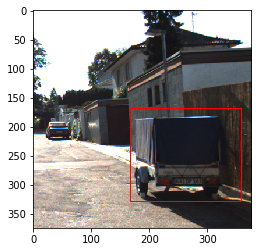

Car


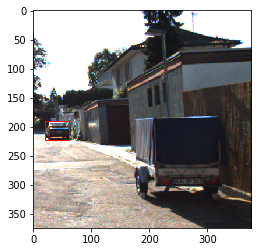

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


im = np.array(Image.open('./test/000002.png'))
with open('./test/000002.json') as fr:
    info=json.load(fr)
#     print(info)
    image_width=info['image_width']
#     image_width=1242
    image_height=info['image_height']
    print(image_width,image_height)
    for each_box in info['bboxes']:
        label=each_box['label']
        print(label)
        x1=image_width*(each_box['x_min'])
        y1=image_height*(each_box['y_min'])
        box_width=image_width*(each_box['x_max']-each_box['x_min'])
        box_height=image_height*(each_box['y_max']-each_box['y_min'])
        

        # Create figure and axes
#         fig=plt.figure(figsize=(12,12))
        fig,ax = plt.subplots(1)

        # Display the image
        ax.imshow(im)

        # Create a Rectangle patch
        #第一个元组里面表示左上角的坐标，第三个参数表示框的框，第四个参数表示框的高
        rect = patches.Rectangle((x1,y1),box_width,box_height,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axesx
        ax.add_patch(rect)
#         plt.figure(figsize=(12,12))
        plt.show()

In [17]:
import json

In [22]:
with open('./labels/000002.json') as fr:
    info=json.load(fr)
    print(info)
    for each in info['bboxes']:
        x_min=each['x_min']
        x_max=each['x_max']
        box_width=(x_max-x_min)*info['image_width']
        print(x_min,x_max,box_width)

{'bboxes': [{'id': 0, 'x_min': 0.6479790660225443, 'y_min': 0.44624, 'x_max': 0.8014734299516908, 'y_max': 0.8745066666666667, 'label': 'Misc'}, {'id': 1, 'x_min': 0.5292995169082125, 'y_min': 0.5070133333333333, 'x_max': 0.5636634460547505, 'y_max': 0.5957066666666666, 'label': 'Car'}], 'image_width': 1242, 'image_height': 375, 'num_box': 2, 'image_path': '../images/000002.png'}
0.6479790660225443 0.8014734299516908 190.63999999999996
0.5292995169082125 0.5636634460547505 42.68000000000015


In [24]:
with open('./test/000002_1.json') as fr:
    info=json.load(fr)
    print(info)
    for each in info['bboxes']:
        x_min=each['x_min']
        x_max=each['x_max']
        box_width=(x_max-x_min)*info['image_width']
        print(x_min,x_max,box_width)

{'bboxes': [{'id': 0, 'x_min': 0.13429146537842196, 'y_min': 0.44624, 'x_max': 0.28778582930756846, 'y_max': 0.8745066666666667, 'label': 'Misc'}, {'id': 1, 'x_min': 0.015611916264090198, 'y_min': 0.5070133333333333, 'x_max': 0.04997584541062816, 'y_max': 0.5957066666666666, 'label': 'Car'}], 'image_width': 376, 'image_height': 375, 'num_box': 2, 'image_path': '../images/000002.png'}
0.13429146537842196 0.28778582930756846 57.713880837359085
0.015611916264090198 0.04997584541062816 12.920837359098275
